<center><h2>Random Forest™ </h2></center>
<center><img src="https://vangogh.teespring.com/v3/image/JHRFeIPGYTz3cjqeqCi70fDbNUU/480/560.jpg" width="60%"/></center>

By The End Of This Session You Should Be Able To:
----

- Define Random Forest™ in your words
- Explain the difference between a Decision Tree and Random Forest™
- Explain how Random Forest™ is a Bagging Technique
- List the advantages of Random Forest™

<center><img src="https://cdn-images-1.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png" width="65%"/></center>
A collection of Decision Trees; Probably the most common ensemble method

Developed by [Leo Breimen](http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm) 

He has trademarked all associated names: Random Forest™, RF™, RandomForest™,  Random Forests™

Random Forest™ Trained with Bagging
------  

Repeatedly randomly select data from the dataset (*with replacement*), build a Decision Tree with each new resample.

The default is to have the randomly selected data be the same size as the initial dataset. Note that since we are sampling with replacement, many data points will be repeated in the sample and many won't be included. 

Random Forest™ Training
------  

Limit each node of the Decision Tree to only consider splitting on a random subset of the features. 

For example if there are 100 features, only randomly select 10 features at each split point.



This reduces tree correlation. Why?

Since trees are greedy, each split would always choose the best split. By randomly sampling downsampling from features, we limit how good each individual split is.

Reasonable defaults for feature limits (m)
-----

Classification: $m = {\sqrt p}$

Regression: $m = \frac{p}{3}$

where p is the total number features

m is a hyperparameter that can be learned

Random Forest™ Prediction
------  

To classify a new datapoint, use each tree in the forest to get a prediction. 

Choose the category that gets the most votes.

In [ ]:
reset -fs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy:", rf.score(X_test, y_test)) # 🍾

Accuracy: 1.0


Let's look at the [RandomForestClassifier docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [37]:
for n_estimators in range(1, 5):
    rf = RandomForestClassifier(n_estimators, random_state=1)
    rf.fit(X_train, y_train)
    print(f"# of trees: {n_estimators} | Accuracy: {rf.score(X_test, y_test):.2%}")
    input("Press Enter to continue...")

# of trees: 1 | Accuracy: 93.33%
Press Enter to continue...
# of trees: 2 | Accuracy: 96.67%
Press Enter to continue...
# of trees: 3 | Accuracy: 100.00%
Press Enter to continue...
# of trees: 4 | Accuracy: 100.00%
Press Enter to continue...


Feature Importance
-----

Basically, the higher in the tree the feature is, the more important it is in determining the result of a data point. 

The expected fraction of data points that reach a node is used as an estimate of that feature's importance for that tree. 

Then average those values across all trees to get the feature's importance.

In [38]:
total_importance = 0 
for name, importance in sorted(zip(iris.feature_names, rf.feature_importances_)):
    print(f"{name:<18}: {importance:.4f}")
    total_importance += importance
    
print(f"\nTotal importance: {int(total_importance)}")

petal length (cm) : 0.3744
petal width (cm)  : 0.2526
sepal length (cm) : 0.3014
sepal width (cm)  : 0.0716

Total importance: 1


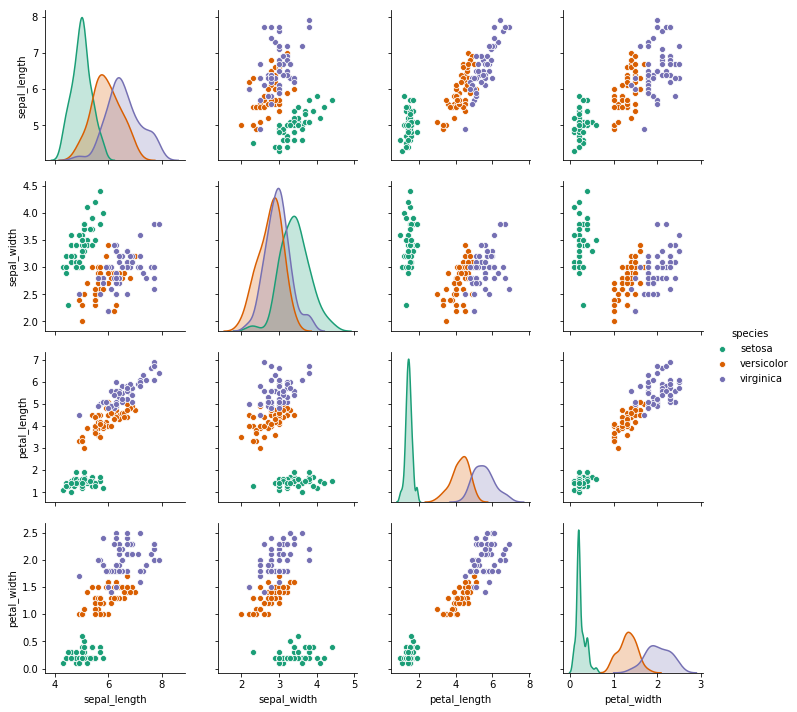

In [39]:
iris_sns = sns.load_dataset("iris")
sns.pairplot(iris_sns, hue='species', size=2.5, palette=palette);

http://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation 

Source: [Applied Data Science](http://columbia-applied-data-science.github.io/appdatasci.pdf) (Section 9.4.2)

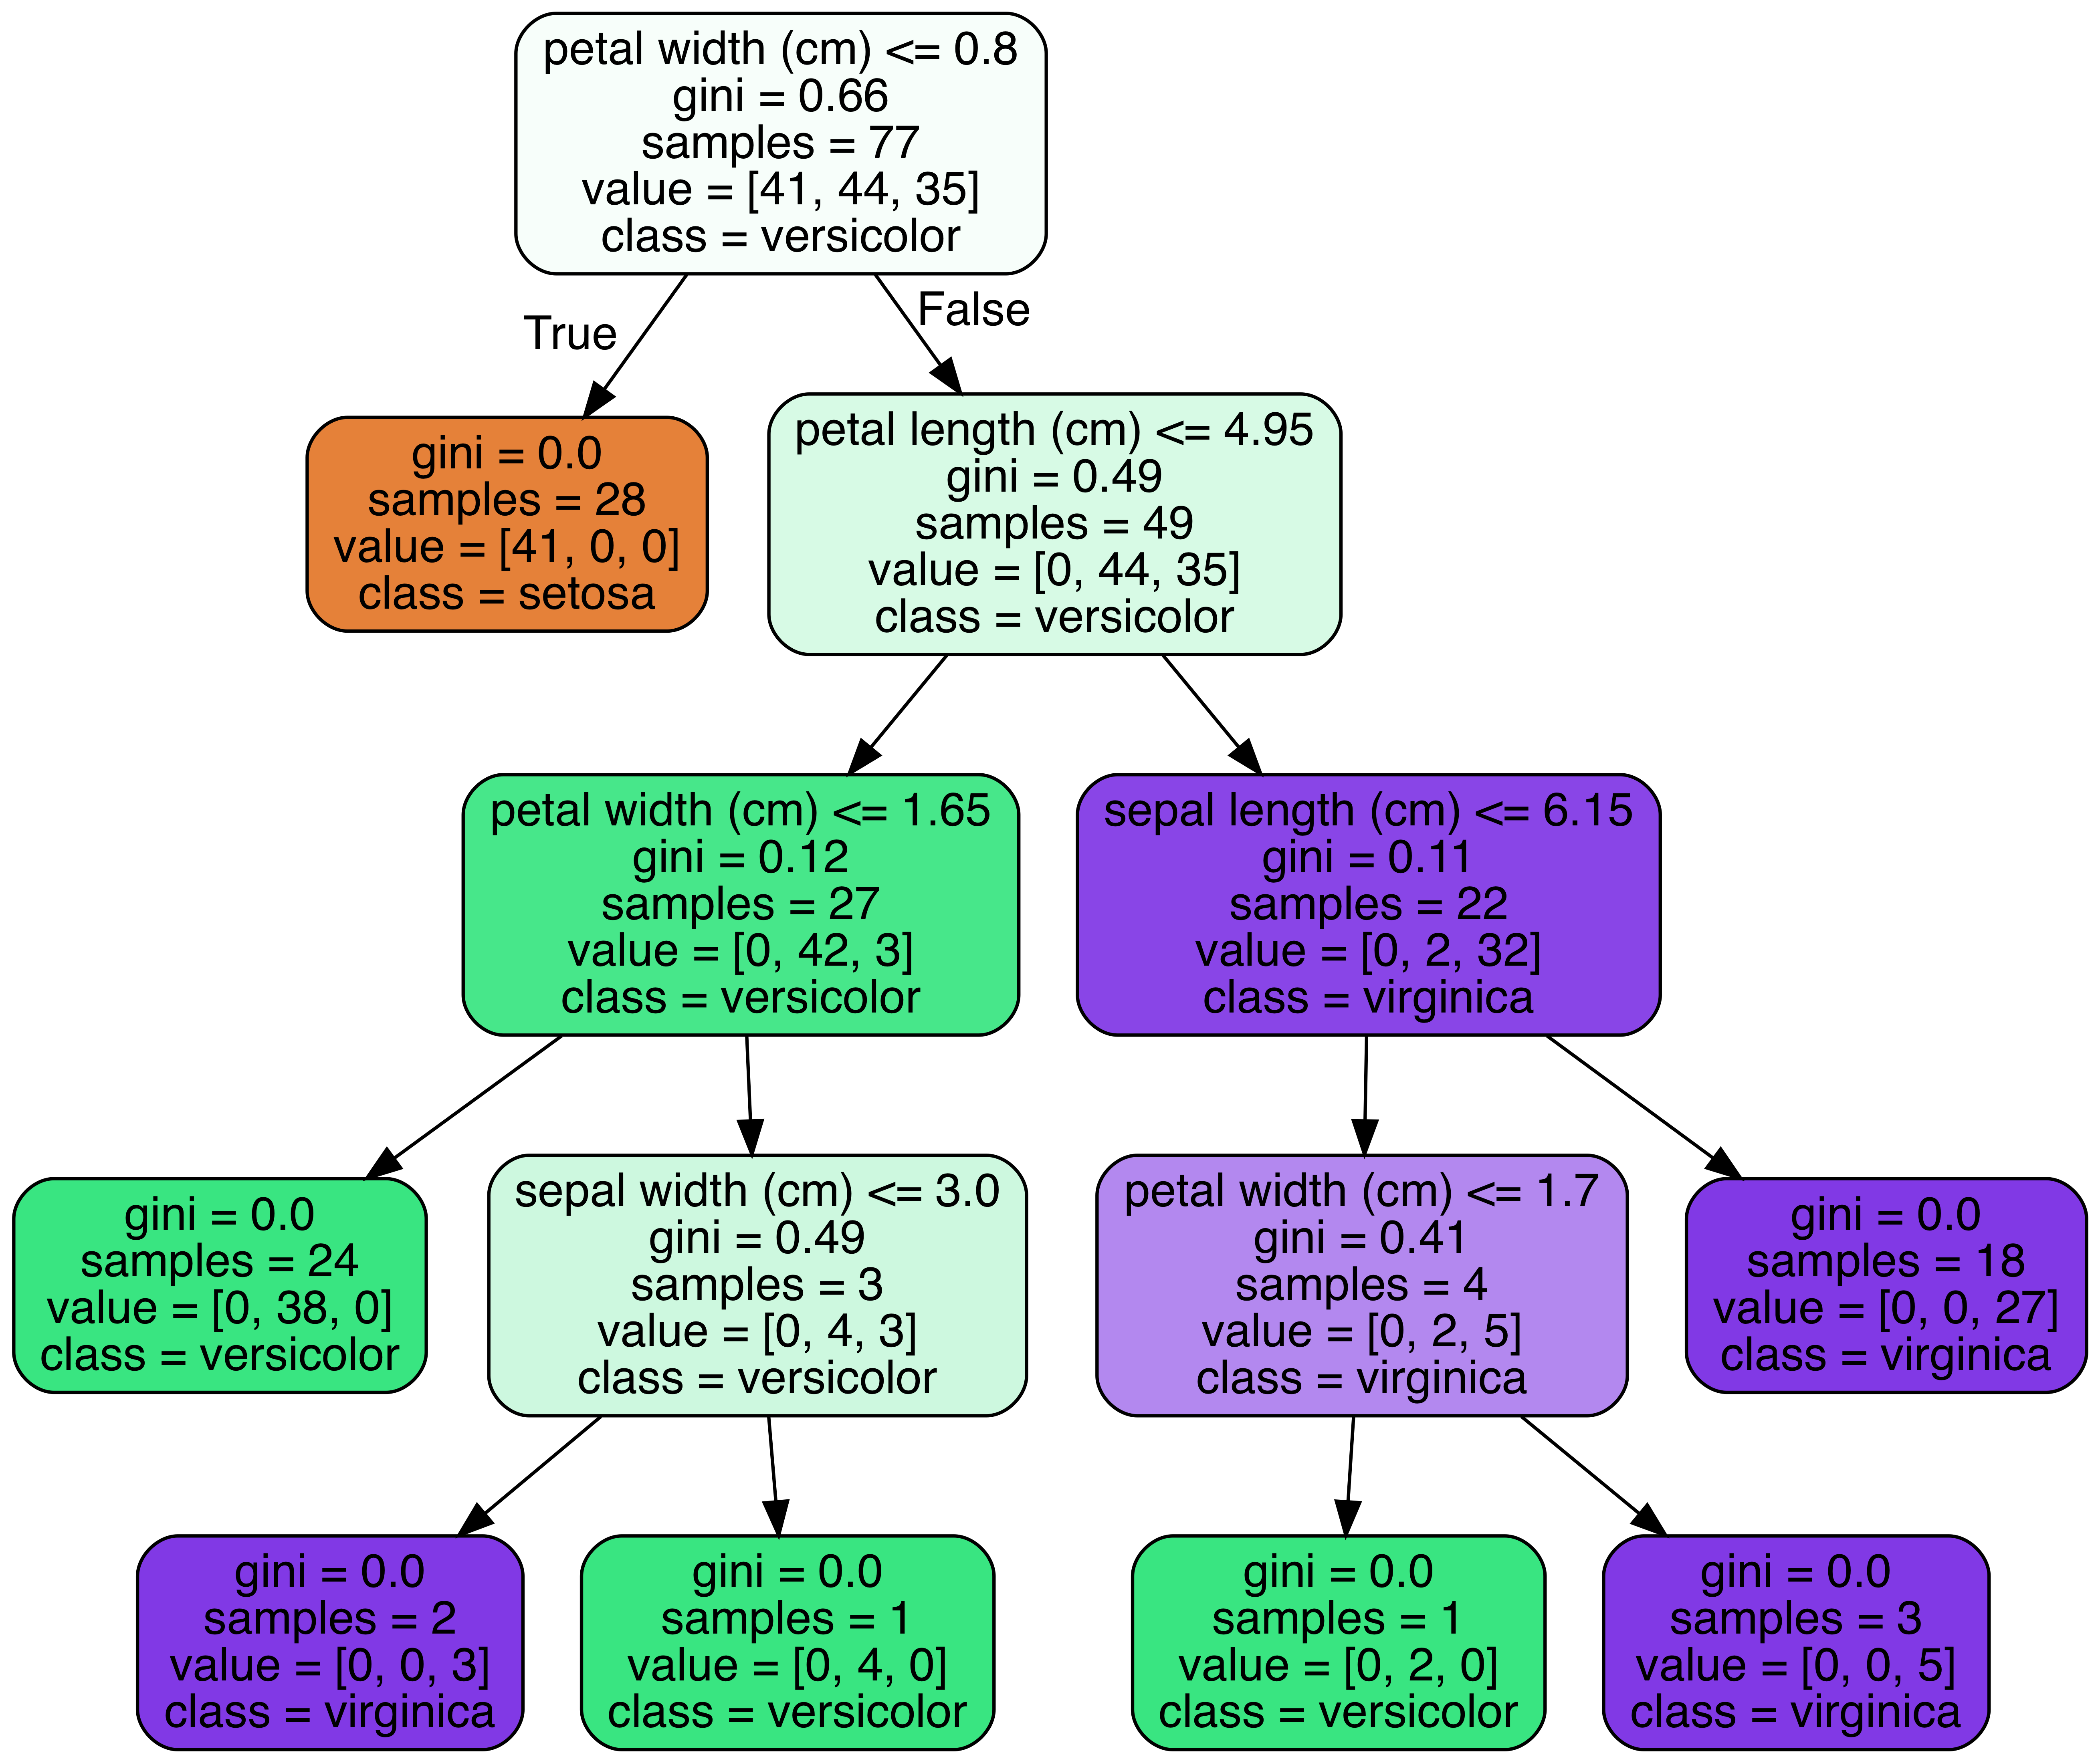

In [41]:
# Train
model = RandomForestClassifier(n_estimators=10, random_state=1)
model.fit(X_train, y_train)

# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Source: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

Advantages  of RF™
-----

- Same advantages as Decision Trees
- Robust to overfitting 
- Robust to missing variables
- Easy to interpret
- Often perform very well with almost no parameter tuning
- Performance is among the best for traditional ML algorithms
- Can be parallelized for distributed computing

Check for understanding
-----

What happens to Variance as the number of trees increases in a RF™?

Variance decreases. 

Greater the number of trees, the better, although there are diminishing returns at a certain point. 

Will also increase computational cost.

Check for understanding
-----
Why is Random Forest usfeul at the Bias-Variance tradeoff?

Especially, when compared to decision trees?

DT are low bias, but can be high variance.

By averaging many low bias trees, RF™ reduce variance.

Check for understanding
-----

When should we __not__ use Random Forest™?

Small data, especially when the total n is small.

Also if we need every feature to learn (i.e., extremely heterogeneous data).

Summary
------

- RF™ is a bagging technique that:
    - Samples data with replacement for each tree
    - Samples features for each split
- RF™ tends to perform well (low bias and variance) and is a white-box model.
- Random Forest™ is the best supervised ML algorithm we have seen thus far.